<a href="https://colab.research.google.com/github/Sylver640/ADA-Informes/blob/main/Informe_KruskalAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Descripción del problema (árbol recubridor mínimo)
**Entrada**: Grafo conectado no dirigido $G=(V,E)$ y un costo real $c_e$ para cada arco $e\in E$.

**Salida**: Un árbol recubridor $T\in E$ de $G$ con el mínimo coste $\sum\limits_{e\in T}c_e$.

Entre muchos de los problemas que trata de resolver la rama matemática que es la teoría de grafos, encontramos al **árbol recubridor mínimo o MST** (Minimum Spanning Tree, por sus siglas en inglés). Éste consiste en encontrar un subgrafo que debe ser un árbol, que por definición no contiene ciclos, el cual trata de conectar un conjunto de objetos de la forma más económica posible. Trabaja solo en grafos conectados **no dirigidos** y donde cada arco $e$ tiene un costo o peso $c_e$. Además, siempre debe cumplir propiedades, siendo algunas de ellas las siguientes:

1. El árbol $T$ no debe contener ciclos.
2. Un árbol recubridor de $n$ vértices tiene $n-1$ arcos.
3. Para cada par de vértices $v,w\in V$, $T$ debe incluir un camino $v \leadsto w$ (recubridor)

![image](https://upload.wikimedia.org/wikipedia/commons/d/d2/Minimum_spanning_tree.svg)

Este problema tiene una relación directa en problemas del diseño de redes, incluyendo redes computacionales, de transporte, de telecomunicaciones, entre otras, además del aprendizaje automático. Ahora bien, muchos algoritmos han encontrado una forma de resolver este problema. El primero de ellos fue desarrollado por el científico checo Otakar Borůvka en 1926. Plantando esta semilla, en las décadas siguientes fueron inventados dos algoritmos que tratan de encontrar la mejor solución, **Prim y Kruskal**, siendo el último nuestro enfoque de análisis.

#2. Algoritmo de Kruskal
Este algoritmo fue inventado en 1956 por el matemático y científico estadounidense **Joseph Kruskal**. A continuación, el siguiente código presenta una implementación del algoritmo.

##2.1 Código

In [58]:
import networkx as nx #Librería complementaria para trabajar con grafos
import random
import matplotlib.pyplot as plt
from termcolor import cprint

#Función merge modificada tal que compare bajo el criterio de los pesos de cada
#conexión.
def merge(array, left, right, verbose = False):
  aux = []
  leftPos = 0
  rightPos = 0

  #Bucle que se detiene cuando un arreglo se termina de recorrer
  while(leftPos < len(left) and rightPos < len(right)):
    if (left[leftPos][2] < right[rightPos][2]):
      aux.append(left[leftPos])
      leftPos+=1
    else:
      aux.append(right[rightPos])
      rightPos+=1
  
  #Se agregan los números restantes del arreglo izquierdo
  while (leftPos < len(left)):
    aux.append(left[leftPos])
    leftPos+=1

  #Se agregan los números restantes del arreglo derecho
  while (rightPos < len(right)):
    aux.append(right[rightPos])
    rightPos+=1
  
  #Se copian los valores del arreglo auxiliar al original
  for i in range(len(aux)):
    array[i] = aux[i]

#Merge Sort utilizado por el algoritmo
def merge_sort(array):
  if (array[0] == array[-1]): return

  mid = len(array) // 2 #Se define mitad del arreglo
  leftArray = array[:mid]
  rightArray = array[mid:]
  
  merge_sort(leftArray)
  merge_sort(rightArray)
 
  merge(array, leftArray, rightArray)

# Crea un grafo de tipo array de arrays
# que contiene [i, j, peso]
# siendo i y j los nodos conectados
def graph_instance_creator(V):
  graph = []
  for i in range(V):
    for j in range(i+1, V):
      graph.append([i, j, random.randint(1, 500)])
  
  return graph

# Recibe un grafo de tipo array
# Retorna un nx.Graph de la libreria networkx
def graph_to_nxgraph(graph):
  nxgraph = nx.Graph()
  for i in graph:
    nxgraph.add_edge(i[0], i[1], weight=i[2])
  return nxgraph

#-----ESTRUCTURA UNION-FIND-----#

def find(parent, i):
  #Si el padre en la posición i es igual a esta, retorna este conjunto como el subárbol
  #que tiene como padre este nodo
  if parent[i] == i:
    return i
  else:
    return find(parent, parent[i]) #Si no, realizamos una llamada recursiva que permita seguir buscando

def union(parent, x, y):
  parent[x] = y #Se realiza la unión entre los dos subárboles encontrados

#-------------------------------#

def kruskalMST(G, verbose):
  if verbose == True: print("--------------------")
  T = [] #Árbol encontrado
  i = 0 #Índice para recorrer el grafo

  merge_sort(G) #Se ordena el grafo de menor a mayor de acuerdo al peso
  if verbose == True:
    print("Se ordena el grafo de acuerdo a su peso")
    print(G)
  parent = []

  #Se llena el arreglo auxiliar que servirá para recorrer cada subárbol correspondiente
  #en las funciones vinculadas a la estructura Union-Find
  for node in range(len(G)):
    parent.append(node)

  #Ciclo que busca el árbol, el cual recorre cada una de las conexiones ordenadas de menor a mayor
  while i < len(G) - 1:
    u, v, w = G[i] #Variables correspondientes a la i-esima posición del grafo
    i+=1

    #Buscamos los padres de cada nodo de la conexión analizada en aquel momento,
    #o en otras palabras, verificamos si no se genera un ciclo.
    x = find(parent, u)
    y = find(parent, v)
    
    #Si la conexión mantiene al árbol acíclico, se agrega a éste, además de unirse
    #a los subárboles generados hasta ese momento
    if (x != y):
      T.append([u,v,w])
      union(parent, x, y)
    
    #Si no, se avanza con la siguiente conexión.
  
  if verbose == True: print("--------------------")
  return T #Se retorna el árbol encontrado, que contiene cada conexión y su peso correspondiente  

#Ejemplo
n = random.randint(5,8)
G = graph_instance_creator(n)

cprint("Conexiones = [Nodo x, Nodo y, Peso]", 'red', attrs=['bold'])

cprint(f"Grafo generado: {G}", 'yellow', attrs=['bold'])
print(f"Cantidad de nodos: {n}")
print(f"Cantidad de vertices: {len(G)}")
#grafico = graph_to_nxgraph(G)
#nx.set_edge_attributes(G, {e: {'weight': random.randint(1, 100)} for e in G.edges})
#nx.draw(grafico)

T = kruskalMST(G, verbose = False)
cprint(f"Árbol mínimo recubridor encontrado: {T}", 'yellow', attrs=['bold'])
print(f"Cantidad de nodos: {len(T)+1}")
print(f"Cantidad de vertices: {len(T)}")

Conexiones = [Nodo x, Nodo y, Peso]
Grafo generado: [[0, 1, 337], [0, 2, 32], [0, 3, 90], [0, 4, 61], [0, 5, 401], [0, 6, 339], [1, 2, 306], [1, 3, 249], [1, 4, 124], [1, 5, 269], [1, 6, 168], [2, 3, 288], [2, 4, 161], [2, 5, 96], [2, 6, 150], [3, 4, 227], [3, 5, 132], [3, 6, 393], [4, 5, 127], [4, 6, 319], [5, 6, 177]]
Cantidad de nodos: 7
Cantidad de vertices: 21
Árbol mínimo recubridor encontrado: [[0, 2, 32], [0, 4, 61], [0, 3, 90], [2, 5, 96], [1, 4, 124], [2, 6, 150]]
Cantidad de nodos: 7
Cantidad de vertices: 6


#2.2 Descripción del algoritmo
Siguiendo con la línea de estudio, el algoritmo estudiado es constructivo, y fue implementado siguiendo la metodología **greedy o voraz**, es decir, construye una solución paso a paso en base a una regla heurística. Recibe un grafo $G$ de $n$ nodos, y retorna una lista que contiene las conexiones del árbol recubridor encontrado, junto con el peso de cada una. De forma general, funciona de la siguiente manera:
1. En una lista se guarda cada conexión del grafo, las que luego se ordenan de menor a mayor utilizando un algoritmo de ordenamiento eficaz, como en este caso, **Merge Sort**.
2. Luego, en un ciclo `for` recorremos cada arco, comenzando con el menor. En cada iteración se verifica si es que éste genera un ciclo con ayuda de la estructura complementaria **Union-Find**. Dependiendo el resultado sucederá uno de los siguientes casos: si $T\cup{e}$ es acíclico, agregamos esta conexión a nuestro árbol, si no seguimos con el siguiente arco.
3. Finalmente retornamos este árbol, el cual incluye todas las conexiones y los pesos de cada una de ellas.

![image](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/MST_kruskal_en.gif/600px-MST_kruskal_en.gif)

#2.3 Ejemplo
Para mostrar el funcionamiento del algoritmo, consideraremos el siguiente grafo no dirigido.

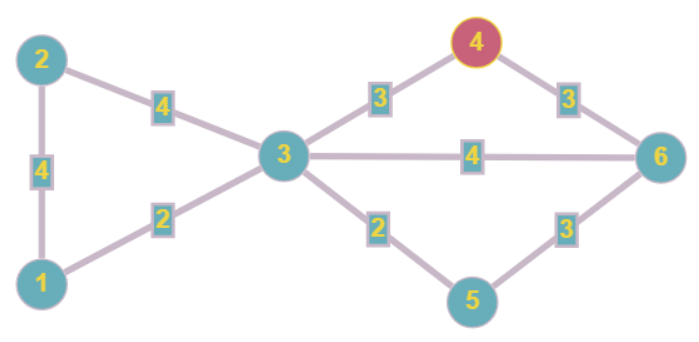

Comenzaremos guardando cada peso de cada arco dentro de una lista, junto a sus conexiones, siendo las primeras dos variables de cada posición cada nodo conectado, y la última el peso de su arco que los conecta.

$e = [[1,2,4],[1,3,2],[2,3,4],[3,4,3],[3,6,4],[3,5,2],[4,6,3],[5,6,3]]$

Al tener estos datos, ahora procedemos a ordenar cada uno con respecto a su peso, utilizando Merge Sort, quedando de la siguiente manera:

$e = [[3,5,2],[1,3,2],[3,4,3],[4,6,3],[5,6,3],[1,2,4],[2,3,4],[3,6,4]]$

Por lo tanto, luego de realizar los pasos anteriores, ingresamos a nuestro ciclo, en donde vemos cada conexión, comenzando con la menor.

Luego de verificar que no se genere un ciclo, agregamos la conexión $[3,5,2]$ a nuestro árbol recubridor.

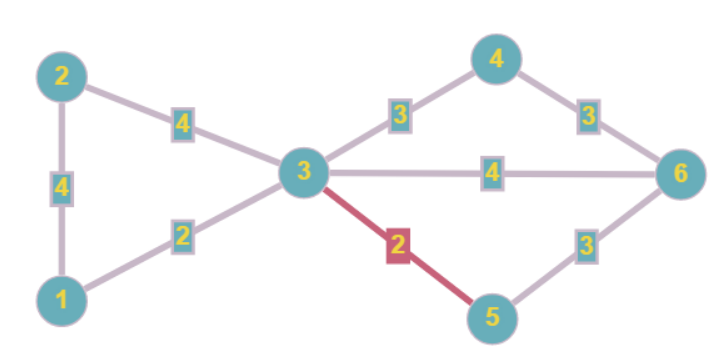

Seguimos con la siguiente conexión, es decir $[1,3,2]$. Puesto que tampoco genera un ciclo, se agrega al árbol.

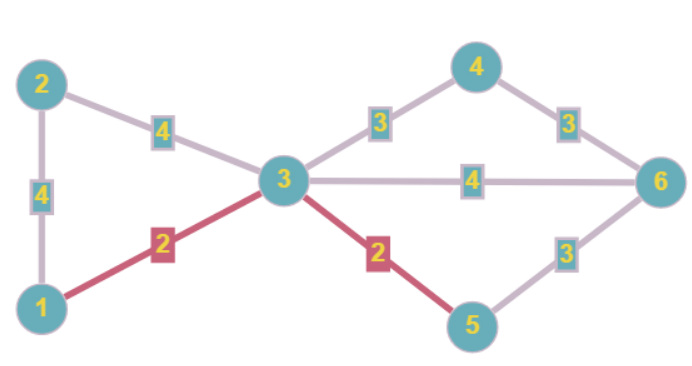

Luego, verificamos si la conexión $[3,4,3]$ genera un ciclo, lo que no sucede, por lo que también se agrega al árbol.

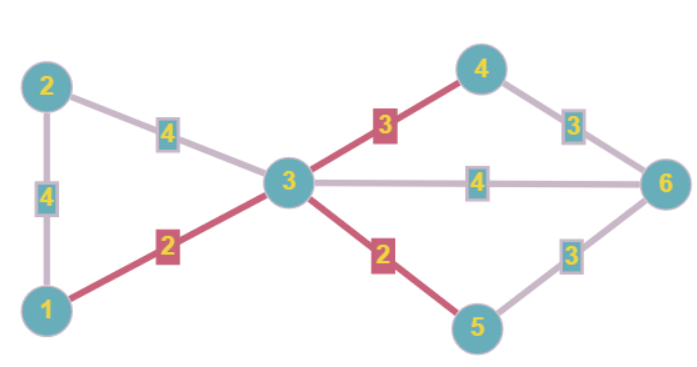

Luego, está la conexión $[4,6,3]$, la cual tampoco genera un ciclo tras verificar con nuestra estructura **Union-Find**, por lo que se agrega al árbol.

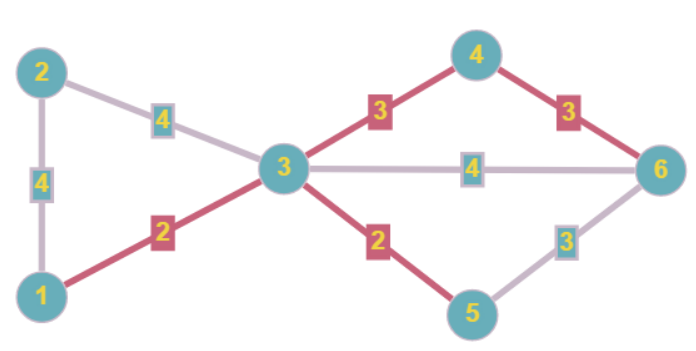

Sin embargo, no podemos decir lo mismo de la siguiente conexión, es decir, $[5,6,3]$, donde si verificamos la existencia de un ciclo, observamos que esto sí sucede, por lo que **no** se agrega al árbol, y continuamos.

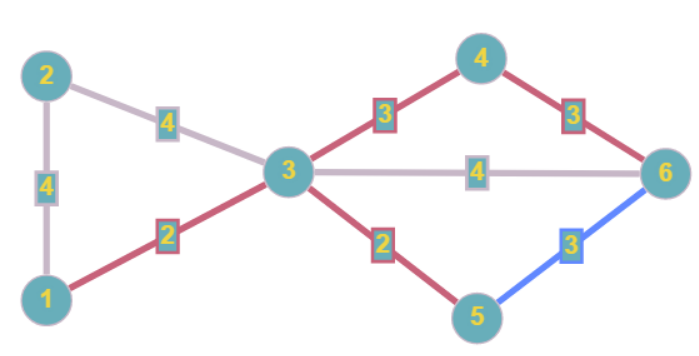

Continuamos con la conexión $[1,2,4]$, el cual no genera un ciclo, por lo que también se agrega al árbol.

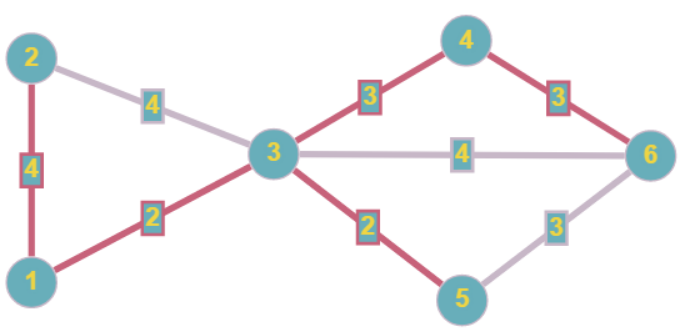

Luego, la conexión $[2,3,4]$ genera un ciclo, por lo que no se agrega.

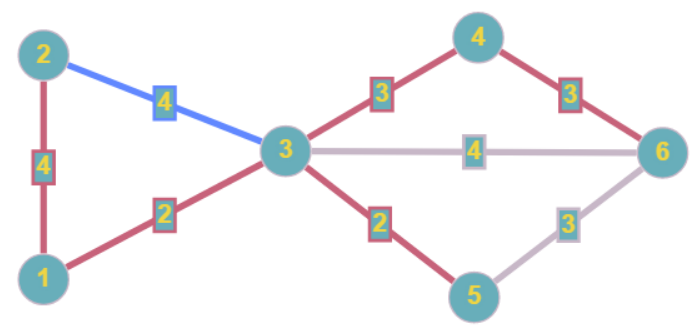

Finalmente, vemos la conexión $[3,6,4]$, la que también genera un ciclo, por lo que tampoco se agrega al árbol.

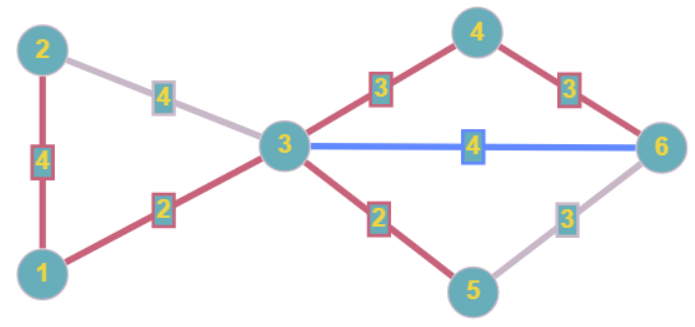

Así terminamos de recorrer todo el grafo, siendo el árbol encontrado el siguiente:

$T = [[1,3,2],[3,5,2],[3,4,3],[4,6,3],[1,2,4]]$

El cual visto de forma gráfica se vería de la siguiente manera:

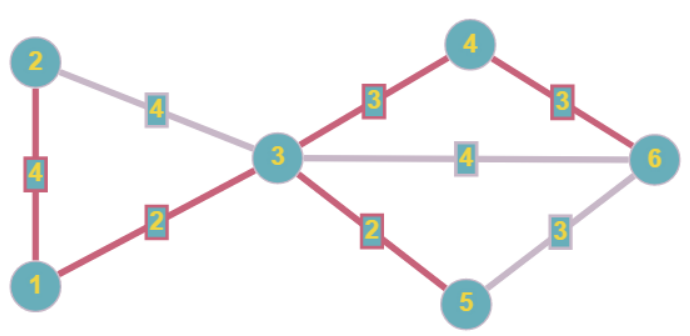

##2.4 Ejecución del algoritmo paso a paso (`verbose = True`)
Al determinar que `verbose` sea igual a `True` en todas las funciones, al ejecutar el programa mostrarán cómo se realiza todo paso a paso, tal como se ve a continuación:

In [59]:
n = random.randint(3,6)
G = graph_instance_creator(n)
cprint(f"Grafo generado: {G}", 'yellow', attrs=['bold'])
T = kruskalMST(G, verbose = True)
cprint(f"Árbol mínimo recubridor encontrado: {T}", 'yellow', attrs=['bold'])

Grafo generado: [[0, 1, 266], [0, 2, 112], [0, 3, 500], [1, 2, 465], [1, 3, 379], [2, 3, 399]]
--------------------
Se ordena el grafo de acuerdo a su peso
[[0, 2, 112], [0, 1, 266], [1, 3, 379], [2, 3, 399], [1, 2, 465], [0, 3, 500]]
--------------------
Árbol mínimo recubridor encontrado: [[0, 2, 112], [0, 1, 266], [1, 3, 379]]


#5. Experimentos

##5.2 Comparación entre los tiempos de ejecución del algoritmo de Prim y el algoritmo de Kruskal